### Executive Summary:

In this exercise the breadth-first search algorithm is examined by creating a five level "connections" graph. Basically, a breadth-first search algorithm will find the shortest path between two nodes that are connected to other nodes by edges. The algorithm will first determine if there is a path leading from one node to the other, and it will then find the shortest path. Each level in this exercise had 5 unique people that had 5 connections to other people. There were no reverse connections. People that were connected to the unique people were searched based on different parameters. One person was searched on the first level, 2 people were searched on the second level, 3 people were searched on the third level, 4 people were searched on the fourth level, and 5 people were searched on the fifth level. People searched on each level were connected to the same unique person. Execution times for searches based on each level were recorded. Thus, the following exercise evaluates the performance of the breadth-first search algorithm. Further explanation on how the search algorithm works, and its relationship to Big O notation is discussed.  

Based on the results of this exercise, it is recommended that a breadth-first search algorithm is used for cases where a connections graph is necessary to solve a shortest path problem. It is useful to the data engineer to know how the algorithm works and how it is implemented, as it is an effective means to solve complex search problems where other search algorithms cannot be easily applied.             

In [1]:
#For math
import numpy as np
#For data
import pandas as pd
#For Plotting
import matplotlib.pyplot as plt
# Timer
from timeit import default_timer as timer
#Deque FIFO
from collections import deque

### Define Function for Breadth-First Search:
 - In contrast to other search algorithms, such as binary search, the breadth-first search is a different kind of algorithm: one that runs on graphs [1].
 - A graph models a set of connections, which is made up of nodes and edges. In code, a graph is implemented through the use of a hash table. 
 - A breadth-first search algorithm helps to answer two questions [1]: 
  - 1.) Is there a path from node A to node B? 
  - 2.) What is the shortest path between node A to node B?  
 - Therefore, a breadth-first search algorithm will find the shortest path between two nodes that are connected to other nodes by edges.
 - The algorithm will search the entire network of connections until it finds the shortest path to the node that is being searched.
 - Breadth-first search works by radiating out from the starting point. It will check first degree connections before second degree connections, third degree connections before second degree connections, and so on.
 - Additionally, the algorithm searches nodes in the order that they are added. In other words, it uses a data structure called a *queue*, which works by using a FIFO (First In, First Out) method; the first item that is added to the queue is the first item that is taken off the queue [1]. It uses this data structure so that first degree connections are searched before second degree connections.    
 - The algorithm is thus implemented by first adding all first degree connections to a queue, which will then "pop" a node off the queue and see if it is the specific node that is being searched. If it is not the node, it will then add all neighboring connections to the queue, and it will continue the process until the node is found or the queue is empty.
 - In terms of Big O notation, it is written as **O(V+E)**. V is for the number of vertices, and E is for the number of edges, or connections. When an entire network is searched, each edge is followed, and so the run time is at the least, **O(number of edges)**. There is also a queue for every node that is to be searched, and adding one node to the queue takes **O(1)** constant time. Doing this for every node will take **(O number of nodes)** total. Therefore, total run time is **O(V+E)** [1].       

In [2]:
# Function searches for name in graph and returns the name, connection name, and level
def name_search(name):
    keys = list(graph.keys())
    for i in range(len(keys)):
        search_queue = deque()
        search_queue += graph[keys[i]]
        for e in range (len(graph[keys[i]])):
            value = search_queue.popleft()
            if value == name:
                name = name
                connection = list(graph.keys())[list(graph.values()).index(graph[keys[i]])]
                return np.array([name, connection])
            else:
                for j in range(len(graph[keys[i]].get(value))):
                    if graph[keys[i]].get(value)[j] == name:
                        connection = value
                        level = list(graph.keys())[list(graph.values()).index(graph[keys[i]])]
                        return np.array([name, connection, level]);
                    
    return print('Name not found.');

### Connections Graph:
 - There are five levels in the graph.
 - Each level has 5 unique people that have 5 connections to other people. 
 - There are no reverse connections. In other words, the breadth-first search algorithm cannot reach the fifth level without going through the first, second, third, and fourth levels.

In [3]:
graph = {}
graph['Level 1'] = {'bob':['alice', 'baxter', 'max', 'diane', 'dina'], 'jack':['james','jim', 'kim', 'cabel', 'efren'],
                  'kate':['jerry', 'michael', 'lee', 'sam', 'grace'], 'gina': ['joanne', 'andy', 'candice', 'ralph', 'kris'],
                  'dexter': ['liam', 'terry', 'brad', 'xin', 'zahid']}
graph['Level 2'] = {'dan' : ['hoss', 'jag', 'jaime', 'sharon', 'tom'], 'oliver': ['will', 'harry', 'alfie', 'ethan', 'ali'],
                  'karen': ['adam', 'lucas', 'sylvia', 'vanessa', 'ben'], 'sue': ['isaac', 'lewis', 'tricia', 'peggy', 'li'],
                  'kang': ['harrison', 'alex', 'leo', 'tucker', 'archie']}
graph['Level 3'] = {'jacob':['janice', 'greg', 'henry', 'oscar', 'noah'], 'mikael': ['mason, ben', 'dave', 'zack', 'mona'],
                  'tobias': ['pat', 'leon', 'rhys', 'ruben', 'rob'], 'reese': ['mohamed', 'kevin', 'cal', 'nick', 'ted'],
                  'tessa': ['cole', 'jason', 'sonny', 'jane', 'joel']}
graph['Level 4'] = {'job': ['tony', 'yusef', 'reuben', 'john', 'kyle'], 'kylie': ['kian', 'miles', 'hugo', 'nat', 'kat' ],
                  'charles': ['natalie', 'tristan', 'art', 'lisa', 'al'], 'alfred': ['stan', 'cam', 'pham', 'vin', 'jim'],
                  'frank': ['connor', 'riley', 'les', 'owen', 'brad']}
graph['Level 5'] = {'abdul': ['pete', 'nila', 'beza', 'theo', 'tommy'], 'jasper': ['marc', 'jen', 'sal', 'mina', 'tina'],
                  'chloe': ['emma', 'jess', 'amelia', 'sophie', 'ruby'], 'olivia':['ella', 'lucy', 'evie', 'mia', 'lola'],
                  'kiki': ['millie', 'phoebe', 'lilly', 'molly', 'megan']}

In [5]:
name_search('kian')

array(['kian', 'kylie', 'Level 4'], dtype='<U7')

### Implementing Breadth-First Search:
 - Total execution times and execution times for each person searched for each level is recorded.
 - One person is searched on the first level, 2 people are searched on the second level, 3 people are searched on the third level, 4 people are searched on the fourth level, and 5 people are searched on the fifth level. 
 - People searched on each level are connected to the same unique person.
 - Person searched, connection, and level are recorded.

#### Search 1: One Person, Level 1

In [101]:
#Search level 1
start = timer()
first_level = name_search('andy')
end = timer()
exec_first = (end-start)*1000
print('Name:', first_level[0], '\n Connection:', first_level[1], '\n Level:', first_level[2],
     '\n Execution Time (ms):', exec_first)

Name: andy 
 Connection: gina 
 Level: Level 1 
 Execution Time (ms): 0.09000000136438757


#### Search 2: 2 People, Level 2

In [38]:
#Search level 2
second_list = ['isaac', 'tricia']
names = []
connection = []
level = []
exec_time = []
for i in range(len(second_list)):
    start = timer()
    name = name_search(second_list[i])
    end = timer()
    exec_time.append((end - start)*1000)
    names.append(name[0])
    connection.append(name[1])
    level.append(name[2])
second_search = np.array([names, connection, level, exec_time, sum(exec_time)])
print('Names:', second_search[0][0], second_search[0][1], '\n Connection:', second_search[1][0], 
      '\n Level:', second_search[2][0], '\n Execution Time (ms):', second_search[3], 
      '\n Total Execution Time (ms):', second_search[4])

Names: isaac tricia 
 Connection: sue 
 Level: Level 2 
 Execution Time (ms): [0.03619999915827066, 0.018999999156221747] 
 Total Execution Time (ms): 0.055199998314492404


#### Search 3: 3 People, Level 3

In [42]:
#Search level 3
third_list = ['cole', 'sonny', 'jane']
names = []
connection = []
level = []
exec_time = []
for i in range(len(third_list)):
    start = timer()
    name = name_search(third_list[i])
    end = timer()
    exec_time.append((end - start)*1000)
    names.append(name[0])
    connection.append(name[1])
    level.append(name[2])
third_search = np.array([names, connection, level, exec_time, sum(exec_time)])
print('Names:', third_search[0][0], third_search[0][1], third_search[0][2], '\n Connection:', third_search[1][0], 
      '\n Level:', third_search[2][0], '\n Execution Time (ms):', third_search[3], 
      '\n Total Execution Time (ms):', third_search[4])

Names: cole sonny jane 
 Connection: tessa 
 Level: Level 3 
 Execution Time (ms): [0.04850000186706893, 0.02550000135670416, 0.023799999326001853] 
 Total Execution Time (ms): 0.09780000254977494


#### Search 4: 4 People, Level 4

In [60]:
#Search level 4
fourth_list = ['natalie', 'art', 'tristan', 'lisa']
names = []
connection = []
level = []
exec_time = []
for i in range(len(fourth_list)):
    start = timer()
    name = name_search(fourth_list[i])
    end = timer()
    exec_time.append((end - start)*1000)
    names.append(name[0])
    connection.append(name[1])
    level.append(name[2])
fourth_search = np.array([names, connection, level, exec_time, sum(exec_time)])
print('Names:', fourth_search[0][0], fourth_search[0][1], fourth_search[0][2], fourth_search[0][2], 
      '\n Connection:', fourth_search[1][0], 
      '\n Level:', fourth_search[2][0], '\n Execution Time (ms):', fourth_search[3], 
      '\n Total Execution Time (ms):', fourth_search[4])

Names: natalie art tristan tristan 
 Connection: charles 
 Level: Level 4 
 Execution Time (ms): [0.04819999958272092, 0.030899998819222674, 0.027500002033775672, 0.02809999932651408] 
 Total Execution Time (ms): 0.13469999976223335


#### Search 5: 5 People, Level 5

In [61]:
#Search level 5
fifth_list = ['ella', 'lucy', 'evie', 'mia', 'lola']
names = []
connection = []
level = []
exec_time = []
for i in range(len(fifth_list)):
    start = timer()
    name = name_search(fifth_list[i])
    end = timer()
    exec_time.append((end - start)*1000)
    names.append(name[0])
    connection.append(name[1])
    level.append(name[2])
fifth_search = np.array([names, connection, level, exec_time, sum(exec_time)])
print('Names:', fifth_search[0][0], fifth_search[0][1], fifth_search[0][2], fifth_search[0][3], fifth_search[0][4], 
      '\n Connection:', fifth_search[1][0], '\n Level:', fifth_search[2][0], '\n Execution Time (ms):', fifth_search[3], 
      '\n Total Execution Time (ms):', fifth_search[4])

Names: ella lucy evie mia lola 
 Connection: olivia 
 Level: Level 5 
 Execution Time (ms): [0.060599999414989725, 0.03769999966607429, 0.03650000144261867, 0.03600000127335079, 0.03610000203480013] 
 Total Execution Time (ms): 0.2069000038318336


### Table of Person Searched, Search Connection, Level, Execution Time, and Total Execution Time of People Searched on Each Level:
 - Though total execution time is significantly different for each level, single person execution time per level is not. 
 - Although Big O notation is **O(V+E)** run time, the algorithm seems to run very fast. If the graph was remodeled so that  linear search can be applied, which is **O(*n*)** time, it is presumable that linear search would be slower. 
 - As the algorithm works by finding the shortest path between nodes that are connected to other nodes, it is evident that it is an effective method of search, especially for complex data sets. 
 - It is also important to note that the order in which the key/value pairs were added did not matter. The level where the connections were did not seem to matter either.
 - In comparison to the previous exercise, the time it took to search for 5 people at the fifth level was similar to dictionary search, and it did better than binary and linear search.
 - However, as it does take **O(V+E)** time it is recommended that if the data does not pose complexity, where a graph is not needed, then other search algorithms should be explored. 

In [102]:
search_people = pd.DataFrame(np.array([[first_level[0], first_level[1], first_level[2], exec_first, exec_first],
                                      [second_search[0][0], second_search[1][0], second_search[2][0], second_search[3][0], 
                                      second_search[4]], [second_search[0][1], second_search[1][0], second_search[2][0], 
                                      second_search[3][1], second_search[4]], [third_search[0][0], third_search[1][0], 
                                      third_search[2][0], third_search[3][0], third_search[4]], [third_search[0][1], 
                                      third_search[1][0], third_search[2][0], third_search[3][1], third_search[4]],
                                      [third_search[0][2], third_search[1][0], third_search[2][0], third_search[3][2], 
                                       third_search[4]], [fourth_search[0][0], fourth_search[1][0], fourth_search[2][0], 
                                       fourth_search[3][0], fourth_search[4]], [fourth_search[0][1], fourth_search[1][0], 
                                       fourth_search[2][0], fourth_search[3][1], fourth_search[4]], [fourth_search[0][2], 
                                       fourth_search[1][0], fourth_search[2][0], fourth_search[3][2], fourth_search[4]],
                                      [fourth_search[0][3], fourth_search[1][0], fourth_search[2][0], fourth_search[3][3], 
                                       fourth_search[4]], [fifth_search[0][0], fifth_search[1][0], fifth_search[2][0], 
                                       fifth_search[3][0], fifth_search[4]], [fifth_search[0][1], fifth_search[1][0], 
                                       fifth_search[2][0], fifth_search[3][1], fifth_search[4]], [fifth_search[0][2], 
                                       fifth_search[1][0], fifth_search[2][0], fifth_search[3][2], fifth_search[4]],
                                      [fifth_search[0][3], fifth_search[1][0], fifth_search[2][0], fifth_search[3][3], 
                                       fifth_search[4]], [fifth_search[0][4], fifth_search[1][0], fifth_search[2][0], 
                                       fifth_search[3][4], fifth_search[4]]]), columns = ['Name', 'Connection', 'Level',
                                        'Execution Time', 'Total Execution Time'])
search_people

,Name,Connection,Level,Execution Time,Total Execution Time
0,andy,gina,Level 1,0.09000000136438757,0.09000000136438757
1,isaac,sue,Level 2,0.03619999915827066,0.055199998314492404
2,tricia,sue,Level 2,0.018999999156221747,0.055199998314492404
3,cole,tessa,Level 3,0.04850000186706893,0.09780000254977494
4,sonny,tessa,Level 3,0.02550000135670416,0.09780000254977494
5,jane,tessa,Level 3,0.023799999326001853,0.09780000254977494
6,natalie,charles,Level 4,0.04819999958272092,0.13469999976223335
7,art,charles,Level 4,0.030899998819222674,0.13469999976223335
8,tristan,charles,Level 4,0.027500002033775672,0.13469999976223335
9,lisa,charles,Level 4,0.02809999932651408,0.13469999976223335


### Plots of Execution Times Based On Level and Execution Times Based on Person:
 - As discussed in the above, the plots show that although there is a difference in total execution times by level, execution times by person have more similarities than differences regardless of level.
 - Additionally, differences in total execution times are due to the increases in people searched depending on level.
 - It is also important to note that the higher execution times in the second plot are where the levels change (e.g. Isaac is level 2, Cole is level 3, and so on), and that the following neighbor times drop.
 - Therefore, as the times per person searched show similarities regardless of level, results show that the breadth-first search algorithm works effectively by finding the shortest path.
 - It is useful to the data engineer to know how this works, and how it is implemented, as complex data problems are a common issue where a shortest path solution is required. 
 - Furthermore, longer execution times affect overall program performance and client satisfaction. 

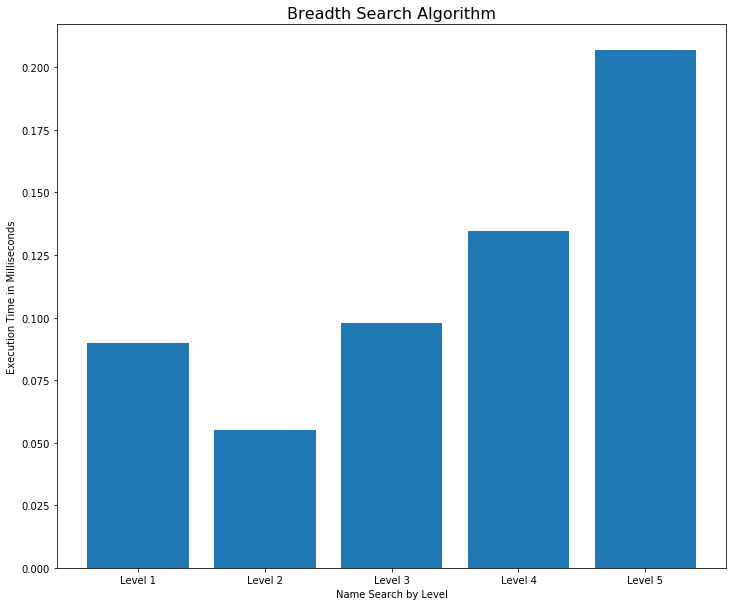

In [103]:
search_people[['Execution Time', 'Total Execution Time']] = search_people[['Execution Time', 
                                                                        'Total Execution Time']].astype('float')
search_people_plot = search_people.iloc[[0,1,3,6,10]]
plt.figure(figsize=(12,10))
plt.bar(search_people_plot['Level'], search_people_plot['Total Execution Time'])
plt.xlabel('Name Search by Level')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Breadth Search Algorithm', fontsize=16)
plt.show();

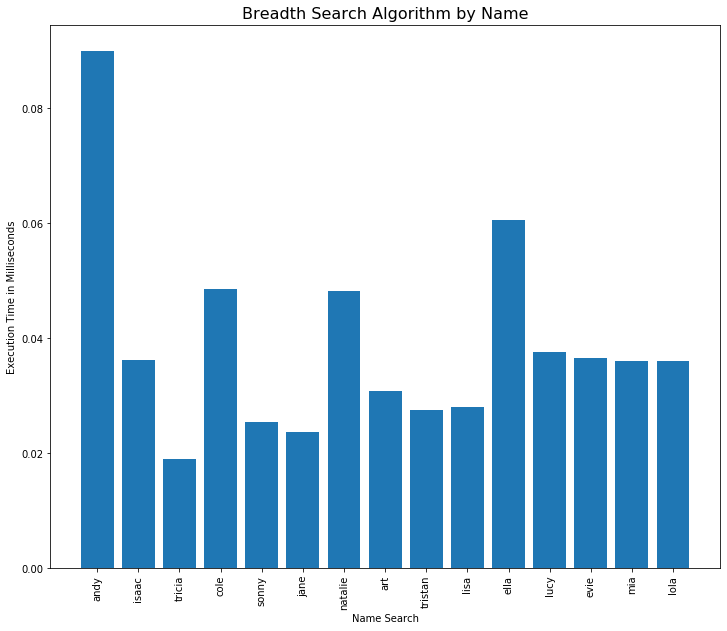

In [113]:
plt.figure(figsize=(12,10))
plt.bar(search_people['Name'], search_people['Execution Time'])
plt.xticks(rotation='90')
plt.xlabel('Name Search')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Breadth Search Algorithm by Name', fontsize=16)
plt.show();

### Conclusion:
In this exercise the breadth-first search algorithm was examined by creating a five level "connections" graph. Basically, a breadth-first search algorithm will find the shortest path between two nodes that are connected to other nodes by edges. The algorithm will first determine if there is a path leading from one node to the other, and it will then find the shortest path. Each level in this exercise had 5 unique people that had 5 connections to other people. There were no reverse connections. People that were connected to the unique people were searched based on different parameters. One person was searched on the first level, 2 people were searched on the second level, 3 people were searched on the third level, 4 people were searched on the fourth level, and 5 people were searched on the fifth level. People searched on each level were connected to the same unique person. Execution times for searches based on each level were recorded.

In terms of Big O notation, the breadth-first search algorithm is written as **O(V+E)**. V is for the number of vertices, and E is for the number of edges, or connections. When an entire network is searched, each edge is followed, and so the run time is at the least, **O(number of edges)**. There is also a queue for every node that is to be searched, and adding one node to the queue takes **O(1)** constant time. Doing this for every node will take **(O number of nodes)** total. Therefore, total run time is **O(V+E)**. As it does take **O(V+E)** time it is recommended that if the data does not pose complexity, where a graph is not needed, then other search algorithms should be explored. 

Total execution times showed differences between levels. This was due to the increases in the number of people searched at each level. However, results showed that the execution time for a single person searched regardless of level were similar to other times recorded for other searches. This was an indication that the breadth-first search algorithm worked effectively by finding the shortest path. This piece of information is useful to the data engineer, as results showed that the algorithm is an efficient way to solve a shortest path problem. It is important for the data engineer to know how the algorithm works, and when to apply it, as complex data problems are a common issue which require shortest path solutions. It is therefore recommended that this algorithm (or similar algorithm) is used to solve complex search problems where other search algorithms cannot be easily applied. 

### References:
[1] Bhargava, A. Y.(2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.